<a href="https://colab.research.google.com/github/venkatamadahav/OBJECT-detection-using-Binary-Neural-Network/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install -q torchvision

import os
import torchvision
import torchvision.transforms as transforms

# Directory where the CIFAR-10 data will be saved
cifar10_dir = '/content/drive/My Drive/cifar10'

# Make sure the directory exists
os.makedirs(cifar10_dir, exist_ok=True)

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Download and load the CIFAR-10 dataset using torchvision
cifar10_train = torchvision.datasets.CIFAR10(root=cifar10_dir, train=True, download=True, transform=transform)
cifar10_test = torchvision.datasets.CIFAR10(root=cifar10_dir, train=False, download=True, transform=transform)

# Optionally, you can create DataLoaders to iterate over the datasets
from torch.utils.data import DataLoader

trainloader = DataLoader(cifar10_train, batch_size=32, shuffle=True)
testloader = DataLoader(cifar10_test, batch_size=32, shuffle=False)

# Print the number of images in the training and test sets
print(f"Number of images in the training set: {len(cifar10_train)}")
print(f"Number of images in the test set: {len(cifar10_test)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.4 MB/s eta 0:00:00


100%|██████████| 170498071/170498071 [00:04<00:00, 37128588.14it/s]


Extracting /content/drive/My Drive/cifar10/cifar-10-python.tar.gz to /content/drive/My Drive/cifar10
Files already downloaded and verified
Number of images in the training set: 50000
Number of images in the test set: 10000


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files already downloaded and verified
Files already downloaded and verified
Training set class counts:
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000

Test set class counts:
airplane: 1000
automobile: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000


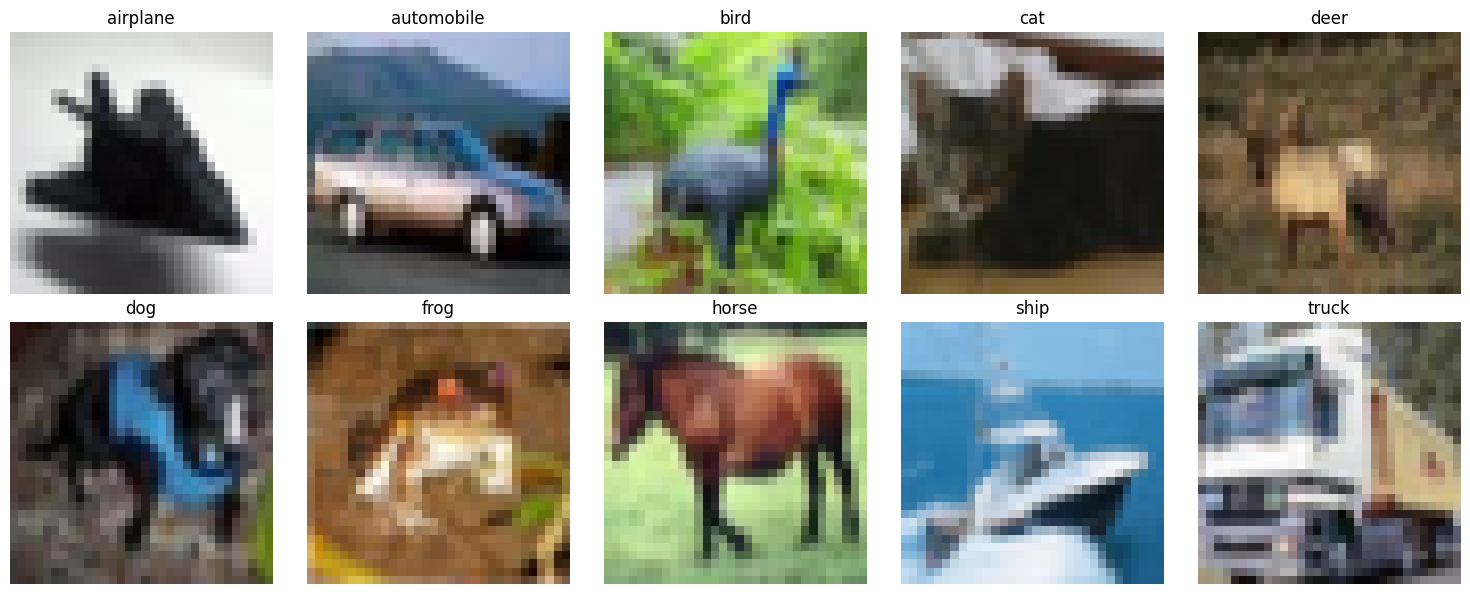

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install -q torchvision

import os
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from PIL import Image
import matplotlib.pyplot as plt

# Directory where the CIFAR-10 data will be saved
cifar10_dir = '/content/drive/My Drive/cifar10'

# Make sure the directory exists
os.makedirs(cifar10_dir, exist_ok=True)

# Define a transform to convert the data to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset using torchvision
cifar10_train = CIFAR10(root=cifar10_dir, train=True, download=True, transform=transform)
cifar10_test = CIFAR10(root=cifar10_dir, train=False, download=True, transform=transform)

# Dictionary to map class indices to class names
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Function to save images from the dataset
def save_images(dataset, dataset_name):
    dataset_path = os.path.join(cifar10_dir, dataset_name)
    os.makedirs(dataset_path, exist_ok=True)

    class_counts = {class_name: 0 for class_name in classes.values()}

    for class_index, class_name in classes.items():
        class_dir = os.path.join(dataset_path, class_name)
        os.makedirs(class_dir, exist_ok=True)

    for index, (image, label) in enumerate(dataset):
        class_name = classes[label]
        image = transforms.ToPILImage()(image)  # Convert tensor to PIL image
        image_path = os.path.join(dataset_path, class_name, f"{index}.png")
        image.save(image_path)
        class_counts[class_name] += 1

    return class_counts

# Save training and test images
train_class_counts = save_images(cifar10_train, "train")
test_class_counts = save_images(cifar10_test, "test")

# Print the counts of images in each class for both training and test sets
print("Training set class counts:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print("\nTest set class counts:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

# Display one image from each class in the training set
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, class_name in enumerate(classes.values()):
    class_dir = os.path.join(cifar10_dir, "train", class_name)
    image_files = os.listdir(class_dir)
    image_path = os.path.join(class_dir, image_files[0])  # Get the first image in the class directory
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the CIFAR-10 Dataset
import os
import numpy as np
from keras.datasets import cifar10
import cv2

# Path to your CIFAR-10 dataset
data_path = '/content/drive/My Drive/cifar10/'

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 3: Preprocess the Images
from keras.preprocessing.image import ImageDataGenerator

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Step 4: Save the Preprocessed Images
preprocessed_path = '/content/drive/My Drive/cifar10/Pre-processed images/'
os.makedirs(preprocessed_path, exist_ok=True)

# Function to save preprocessed images
def save_preprocessed_images(images, labels, subset_name):
    subset_path = os.path.join(preprocessed_path, subset_name)
    os.makedirs(subset_path, exist_ok=True)
    for i in range(images.shape[0]):
        img = images[i]
        label = labels[i][0]
        # Convert back to 0-255 range for saving
        img = (img * 255).astype(np.uint8)
        img_path = os.path.join(subset_path, f'{label}_{i}.png')
        cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Save preprocessed training images
save_preprocessed_images(x_train, y_train, 'train')

# Save preprocessed test images
save_preprocessed_images(x_test, y_test, 'test')


Mounted at /content/drive
170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the CIFAR-10 Dataset
import os
import numpy as np
from keras.datasets import cifar10
import cv2

# Path to your CIFAR-10 dataset
data_path = '/content/drive/My Drive/cifar10/'

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 3: Preprocess the Images
from keras.preprocessing.image import ImageDataGenerator

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Step 4: Save the Preprocessed Images
preprocessed_path = '/content/drive/My Drive/cifar10/Pre-processed images/'
os.makedirs(preprocessed_path, exist_ok=True)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to save preprocessed images
def save_preprocessed_images(images, labels, subset_name):
    subset_path = os.path.join(preprocessed_path, subset_name)
    os.makedirs(subset_path, exist_ok=True)

    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(subset_path, class_name)
        os.makedirs(class_path, exist_ok=True)

        class_images = images[labels.flatten() == class_index]
        for i in range(class_images.shape[0]):
            img = class_images[i]
            # Convert back to 0-255 range for saving
            img = (img * 255).astype(np.uint8)
            img_path = os.path.join(class_path, f'{class_index}_{i}.png')
            cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Save preprocessed training images
save_preprocessed_images(x_train, y_train, 'train')

# Save preprocessed test images
save_preprocessed_images(x_test, y_test, 'test')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


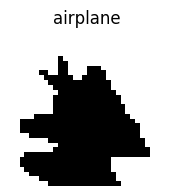

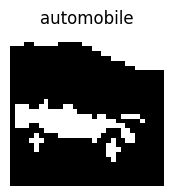

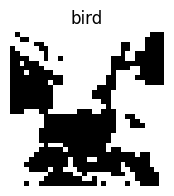

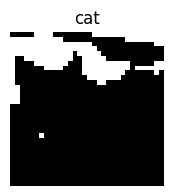

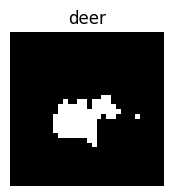

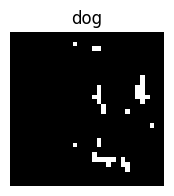

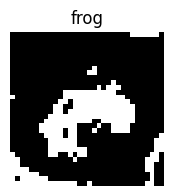

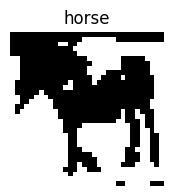

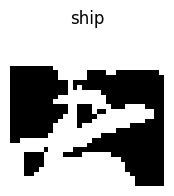

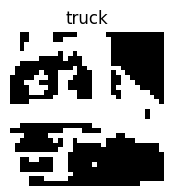

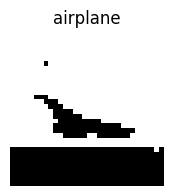

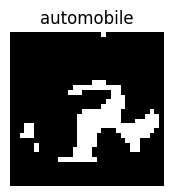

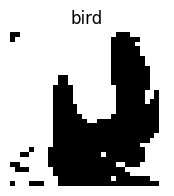

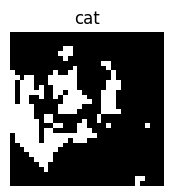

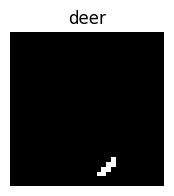

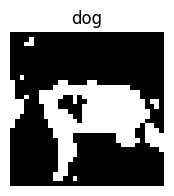

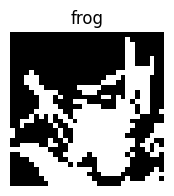

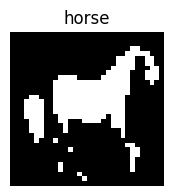

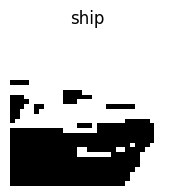

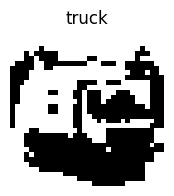

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your preprocessed CIFAR-10 dataset
preprocessed_path = '/content/drive/My Drive/cifar10/Pre-processed images/'
binary_path = '/content/drive/My Drive/cifar10/Binary images/'
os.makedirs(binary_path, exist_ok=True)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to convert images to binary and save
def convert_to_binary_and_save(subset_name):
    subset_preprocessed_path = os.path.join(preprocessed_path, subset_name)
    subset_binary_path = os.path.join(binary_path, subset_name)
    os.makedirs(subset_binary_path, exist_ok=True)

    for class_name in class_names:
        class_preprocessed_path = os.path.join(subset_preprocessed_path, class_name)
        class_binary_path = os.path.join(subset_binary_path, class_name)
        os.makedirs(class_binary_path, exist_ok=True)

        for img_name in os.listdir(class_preprocessed_path):
            img_path = os.path.join(class_preprocessed_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)  # Convert to binary image
            binary_img_path = os.path.join(class_binary_path, img_name)
            cv2.imwrite(binary_img_path, binary_img)

# Convert and save binary images for train and test sets
convert_to_binary_and_save('train')
convert_to_binary_and_save('test')

# Function to show one binary image from each class
def show_one_binary_image_from_each_class(subset_name):
    subset_binary_path = os.path.join(binary_path, subset_name)
    for class_name in class_names:
        class_binary_path = os.path.join(subset_binary_path, class_name)
        image_files = os.listdir(class_binary_path)
        if image_files:
            img_path = os.path.join(class_binary_path, image_files[0])
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            plt.figure(figsize=(2, 2))  # Ensure the image is clear even if small
            plt.imshow(img, cmap='gray')
            plt.title(class_name)
            plt.axis('off')
            plt.show()

# Show one binary image from each class in the training set
show_one_binary_image_from_each_class('train')

# Show one binary image from each class in the test set
show_one_binary_image_from_each_class('test')


Processing class airplane, number of images: 5000
Class airplane processed, total images: 5000
Features for class airplane saved successfully in Google Drive.
Processing class automobile, number of images: 5000
Class automobile processed, total images: 5000
Features for class automobile saved successfully in Google Drive.
Processing class bird, number of images: 5000
Class bird processed, total images: 5000
Features for class bird saved successfully in Google Drive.
Processing class cat, number of images: 5000
Class cat processed, total images: 5000
Features for class cat saved successfully in Google Drive.
Processing class deer, number of images: 5000
Class deer processed, total images: 5000
Features for class deer saved successfully in Google Drive.
Processing class dog, number of images: 5000
Class dog processed, total images: 5000
Features for class dog saved successfully in Google Drive.
Processing class frog, number of images: 5000
Class frog processed, total images: 5000
Feature

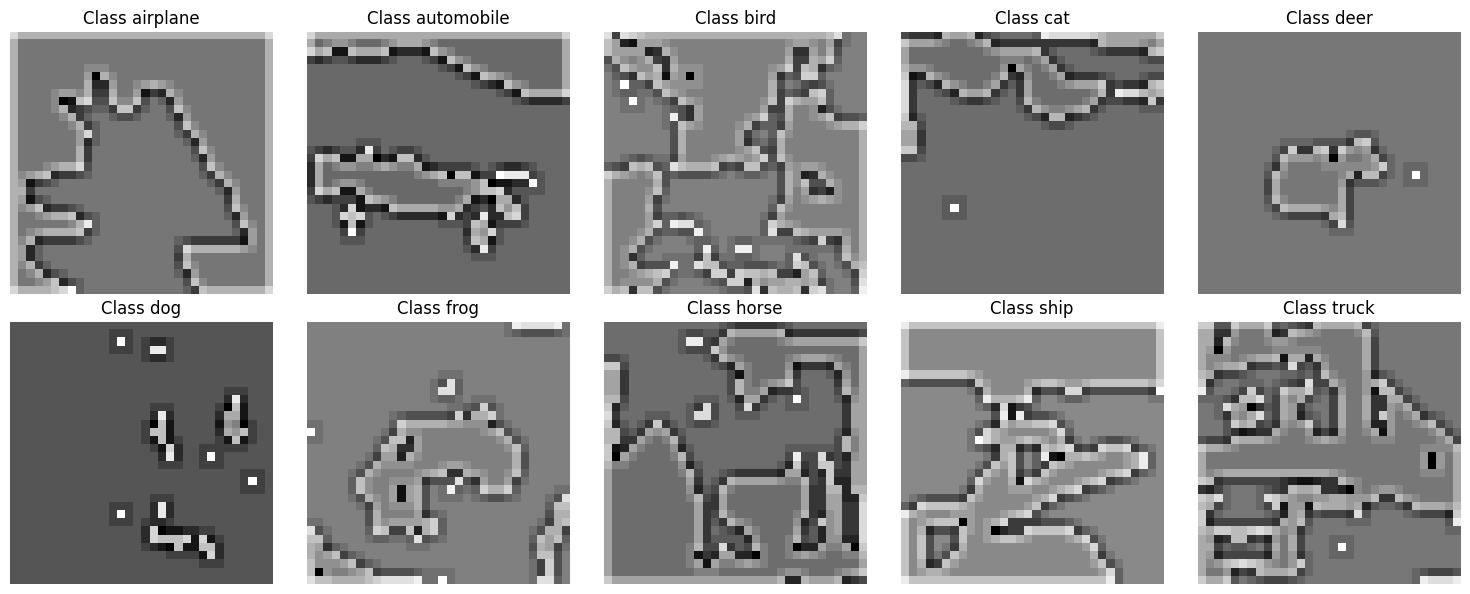

In [ ]:
import os
import torch
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Directory of binary labeled images
binary_labeled_dir = '/content/drive/MyDrive/cifar10/Binary images/train'
feature_save_path = '/content/drive/MyDrive/cifar10/Radial Symmetry Features'
os.makedirs(feature_save_path, exist_ok=True)

# Kernel for radial symmetry
kernel = torch.tensor([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]]).float().unsqueeze(0).unsqueeze(0)

# Function to convert image to tensor
def image_to_tensor(image):
    transform = transforms.ToTensor()
    return transform(image).unsqueeze(0)

# Function to extract radial symmetry features using the specified kernel
def extract_radial_symmetry_features(image):
    binary_tensor = image_to_tensor(image)
    radial_symmetry_image = F.conv2d(binary_tensor, kernel, padding=1)
    return radial_symmetry_image.squeeze().detach().numpy()

# Process and save radial symmetry features
def process_and_save_features(binary_labeled_dir, feature_save_path):
    class_dirs = sorted(os.listdir(binary_labeled_dir))
    class_images = {cls: None for cls in class_dirs}

    for class_idx in class_dirs:
        class_dir = os.path.join(binary_labeled_dir, class_idx)
        os.makedirs(os.path.join(feature_save_path, class_idx), exist_ok=True)

        img_files = os.listdir(class_dir)
        print(f"Processing class {class_idx}, number of images: {len(img_files)}")

        for img_file in img_files:
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                radial_symmetry_image = extract_radial_symmetry_features(img)

                # Save the radial symmetry features as text
                feature_save_txt_path = os.path.join(feature_save_path, class_idx, f"{os.path.splitext(img_file)[0]}_features.txt")
                np.savetxt(feature_save_txt_path, radial_symmetry_image.flatten())

                # Save one image per class for visualization
                if class_images[class_idx] is None:
                    class_images[class_idx] = radial_symmetry_image

        print(f"Class {class_idx} processed, total images: {len(img_files)}")
        print(f"Features for class {class_idx} saved successfully in Google Drive.")

    return class_images

# Save and visualize radial symmetry features
class_images = process_and_save_features(binary_labeled_dir, feature_save_path)

# Plot one radial symmetry image per class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, class_idx in enumerate(sorted(class_images.keys())):
    img = class_images[class_idx]
    if img is not None:
        ax = axes[i]
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Class {class_idx}")
        ax.axis('off')

plt.tight_layout()
plt.show()


Processing class airplane
Processing class automobile
Processing class bird
Processing class cat
Processing class deer
Processing class dog
Processing class frog
Processing class horse
Processing class ship
Processing class truck


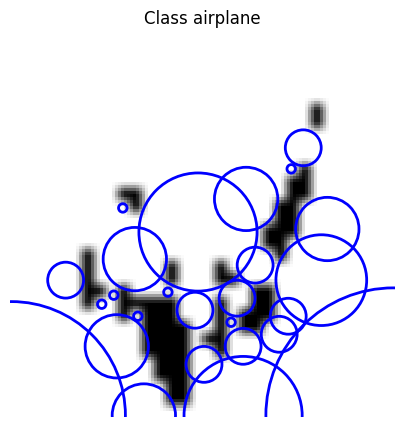

Completed processing class airplane in 6100.94 seconds


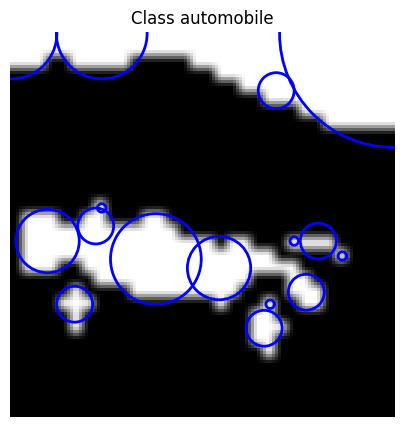

Completed processing class automobile in 6101.22 seconds


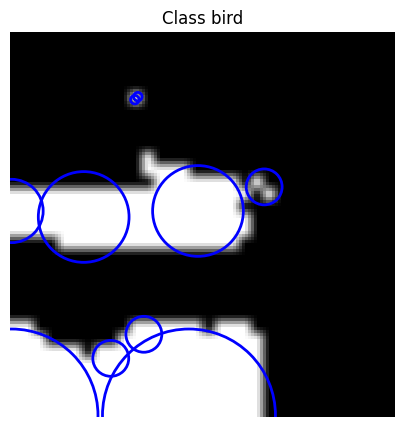

Completed processing class bird in 6101.50 seconds


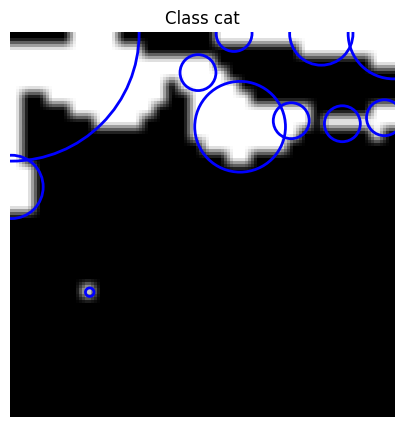

Completed processing class cat in 6101.77 seconds


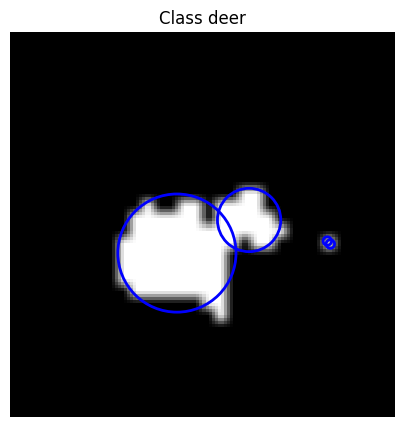

Completed processing class deer in 6102.01 seconds


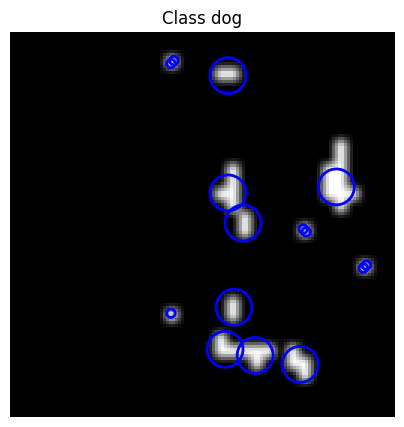

Completed processing class dog in 6102.30 seconds


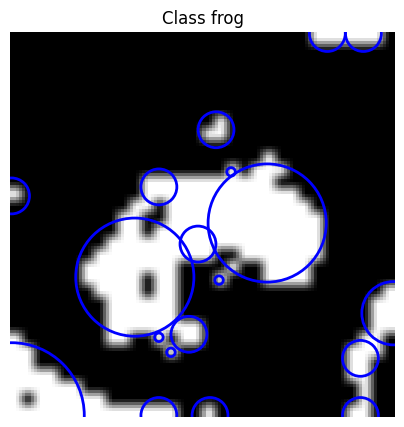

Completed processing class frog in 6102.62 seconds


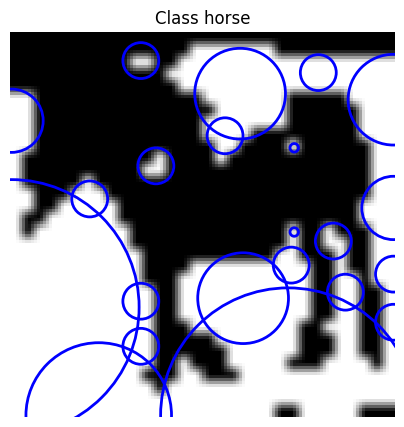

Completed processing class horse in 6102.93 seconds


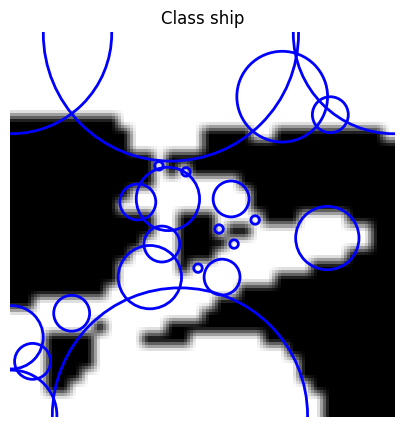

Completed processing class ship in 6103.25 seconds


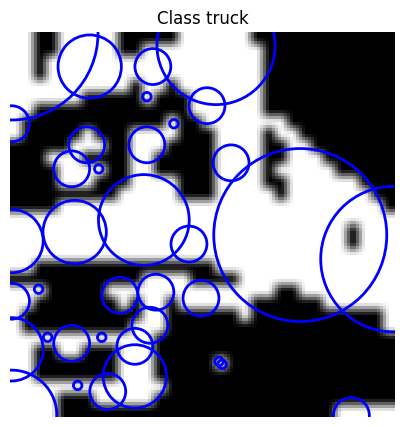

Completed processing class truck in 6103.67 seconds


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
from skimage.color import rgb2gray
from skimage import io
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# Directory of binary labeled images
binary_labeled_dir = '/content/drive/My Drive/cifar10/Binary images/train'
feature_save_path = '/content/drive/My Drive/cifar10/Scale_Invariant_Features'
os.makedirs(feature_save_path, exist_ok=True)

# Function to extract scale-invariant features using the blob_log function
def extract_scale_invariant_features(image):
    image_gray = rgb2gray(image)
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)  # Compute radii in the 3rd column
    return blobs_log

# Process a single image and save features
def process_image(class_idx, img_file):
    class_dir = os.path.join(binary_labeled_dir, class_idx)
    img_path = os.path.join(class_dir, img_file)
    img = cv2.imread(img_path)
    if img is not None:
        # Resize the image for faster processing
        img_resized = cv2.resize(img, (128, 128))  # Reduced resolution to 128x128
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        blobs_log = extract_scale_invariant_features(img_rgb)

        # Ensure the class directory exists before saving
        class_save_path = os.path.join(feature_save_path, class_idx)
        os.makedirs(class_save_path, exist_ok=True)

        feature_save_txt_path = os.path.join(class_save_path, f"{os.path.splitext(img_file)[0]}_features.txt")
        np.savetxt(feature_save_txt_path, blobs_log, fmt='%.5f')

        return class_idx, (img_rgb, blobs_log)
    return class_idx, None

# Process and save scale-invariant features in parallel
def process_and_save_features(binary_labeled_dir, feature_save_path):
    class_dirs = sorted(os.listdir(binary_labeled_dir))
    class_images = {cls: None for cls in class_dirs}

    with ThreadPoolExecutor(max_workers=8) as executor:  # Increased number of workers
        futures = []
        for class_idx in class_dirs:
            start_time = time.time()
            print(f"Processing class {class_idx}")
            class_dir = os.path.join(binary_labeled_dir, class_idx)
            os.makedirs(os.path.join(feature_save_path, class_idx), exist_ok=True)

            for img_file in os.listdir(class_dir):
                futures.append(executor.submit(process_image, class_idx, img_file))

        for future in as_completed(futures):
            class_idx, result = future.result()
            if result is not None and class_images[class_idx] is None:
                class_images[class_idx] = result

        for class_idx in class_dirs:
            # Visualize one image per class immediately after processing all images in that class
            if class_images[class_idx] is not None:
                img, blobs_log = class_images[class_idx]
                plt.figure(figsize=(5, 5))
                plt.imshow(img)
                for blob in blobs_log:
                    y, x, r = blob
                    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
                    plt.gca().add_patch(c)
                plt.title(f"Class {class_idx}")
                plt.axis('off')
                plt.show()
            print(f"Completed processing class {class_idx} in {time.time() - start_time:.2f} seconds")

    return class_images

# Save and visualize scale-invariant features
class_images = process_and_save_features(binary_labeled_dir, feature_save_path)


Processing class airplane
Processing class automobile
Processing class bird
Processing class cat
Processing class deer
Processing class dog
Processing class frog
Processing class horse
Processing class ship
Processing class truck


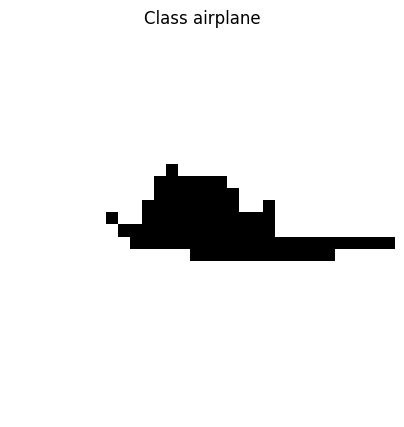

Hu Moments for class airplane: [ 7.59720986e-04  9.67415808e-11  3.55367568e-14  9.28434552e-14
 -4.68916908e-27 -8.59500169e-19 -2.54004521e-27]


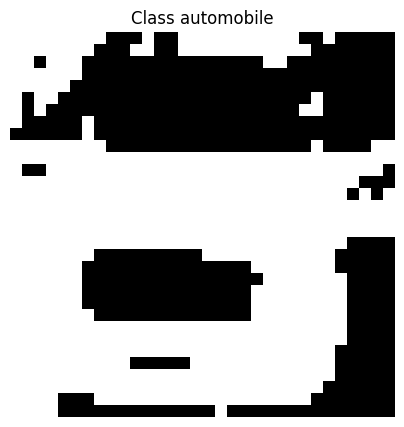

Hu Moments for class automobile: [ 9.93921325e-04  7.22623747e-09  3.60275317e-11  1.48363762e-11
  2.40366093e-22 -8.51756737e-16 -2.44706375e-22]


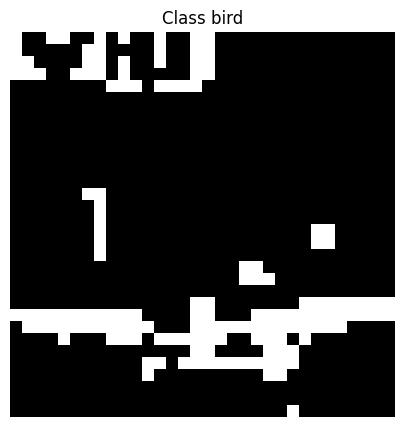

Hu Moments for class bird: [4.32386730e-03 3.58441709e-06 3.04791985e-08 1.40637641e-08
 2.88516620e-16 2.30497606e-11 3.92563261e-17]


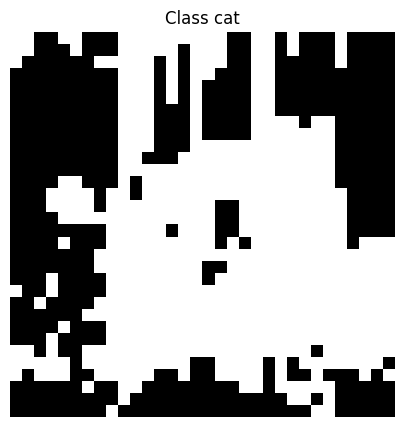

Hu Moments for class cat: [ 8.66448362e-04  1.40823260e-08  9.51831660e-11  1.59380128e-11
 -1.32239041e-22  1.71656055e-15  6.06522308e-22]


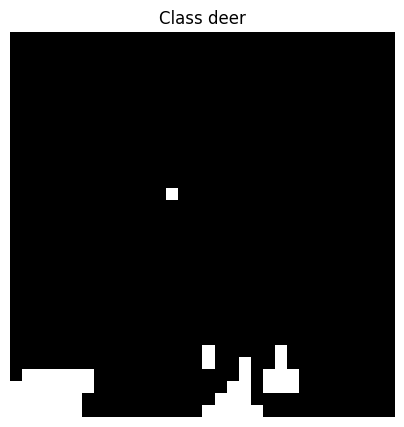

Hu Moments for class deer: [ 6.37705241e-03  2.73729035e-05  9.12580432e-09  7.48944925e-09
 -6.19170494e-17  1.73364010e-11 -5.09346925e-20]


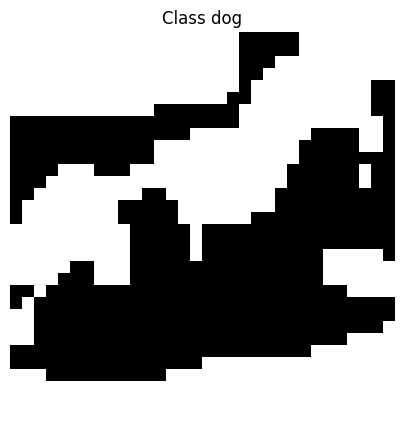

Hu Moments for class dog: [ 1.42928771e-03  3.20574879e-08  3.20466468e-11  8.45166124e-11
  4.19841178e-21  1.51315142e-14 -1.31153534e-21]


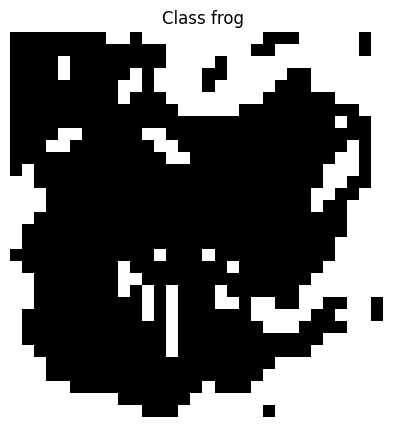

Hu Moments for class frog: [ 2.27998041e-03  8.79699061e-08  1.27068870e-09  6.84076730e-10
  4.46748097e-19 -1.17036668e-13 -4.55181880e-19]


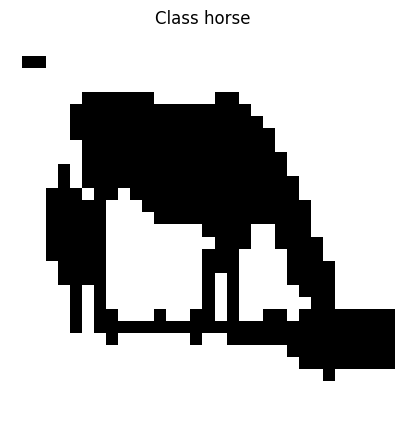

Hu Moments for class horse: [ 1.15560330e-03  1.61473389e-08  7.51574769e-12  2.41007770e-12
 -1.04359286e-24 -1.32675272e-16 -1.02040642e-23]


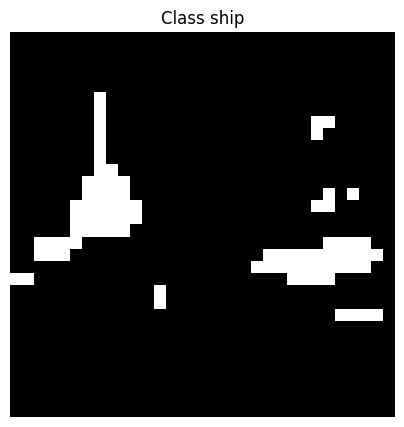

Hu Moments for class ship: [5.40284832e-03 1.67218115e-05 6.02885577e-09 1.30323335e-09
 2.58659710e-18 5.32903413e-12 2.57953272e-18]


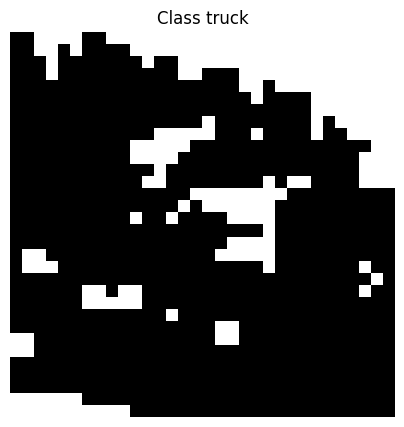

Hu Moments for class truck: [ 2.75446243e-03  1.76001287e-06  9.80600653e-09  8.17012396e-09
  6.59960582e-17  1.07335337e-11 -3.15016940e-17]
Completed processing all classes in 3455.38 seconds


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# Directory of binary labeled images
binary_labeled_dir = '/content/drive/My Drive/cifar10/Binary images/train'
moment_save_path = '/content/drive/My Drive/cifar10/Invariant_Moments'
os.makedirs(moment_save_path, exist_ok=True)

# Function to compute Hu moments of an image
def compute_hu_moments(image):
    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

# Process a single image and save moments
def process_image(class_idx, img_file):
    class_dir = os.path.join(binary_labeled_dir, class_idx)
    img_path = os.path.join(class_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    if img is not None:
        _, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        hu_moments = compute_hu_moments(img_binary)

        # Ensure the class directory exists before saving
        class_save_path = os.path.join(moment_save_path, class_idx)
        os.makedirs(class_save_path, exist_ok=True)

        moment_save_txt_path = os.path.join(class_save_path, f"{os.path.splitext(img_file)[0]}_moments.txt")
        np.savetxt(moment_save_txt_path, hu_moments, fmt='%.8e')  # Use scientific notation for consistency

        return class_idx, img_binary, hu_moments
    return class_idx, None, None

# Process and save invariant moments in parallel
def process_and_save_moments(binary_labeled_dir, moment_save_path):
    class_dirs = sorted(os.listdir(binary_labeled_dir))
    class_images = {cls: None for cls in class_dirs}

    start_time = time.time()
    with ThreadPoolExecutor(max_workers=8) as executor:  # Increased number of workers
        futures = []
        for class_idx in class_dirs:
            print(f"Processing class {class_idx}")
            class_dir = os.path.join(binary_labeled_dir, class_idx)
            os.makedirs(os.path.join(moment_save_path, class_idx), exist_ok=True)

            for img_file in os.listdir(class_dir):
                futures.append(executor.submit(process_image, class_idx, img_file))

        for future in as_completed(futures):
            class_idx, img_binary, hu_moments = future.result()
            if img_binary is not None and class_images[class_idx] is None:
                class_images[class_idx] = (img_binary, hu_moments)

    for class_idx in class_dirs:
        # Visualize one image per class immediately after processing all images in that class
        if class_images[class_idx] is not None:
            img, hu_moments = class_images[class_idx]
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.title(f"Class {class_idx}")
            plt.axis('off')
            plt.show()
            print(f"Hu Moments for class {class_idx}: {hu_moments}")

    print(f"Completed processing all classes in {time.time() - start_time:.2f} seconds")

    return class_images

# Save and visualize invariant moments
class_images = process_and_save_moments(binary_labeled_dir, moment_save_path)


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import warnings

# Define paths
radial_symmetry_path = '/content/drive/MyDrive/cifar10/Radial Symmetry Features'
scale_invariant_path = '/content/drive/MyDrive/cifar10/Scale_Invariant_Features'
invariant_moments_path = '/content/drive/MyDrive/cifar10/Invariant_Moments'
output_path = '/content/drive/MyDrive/cifar10'

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, message='loadtxt: input contained no data')

# Function to load features from a directory and find the minimum length of feature vectors
def load_features_and_find_min_length(directory):
    features = {}
    min_length = float('inf')
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                try:
                    data = np.loadtxt(file_path)
                    if data.size == 0:
                        continue
                    data = data.flatten()  # Ensure the data is flattened
                    label = os.path.basename(root)
                    if label not in features:
                        features[label] = []
                    features[label].append(data)
                    min_length = min(min_length, len(data))
                except ValueError:
                    continue
    return features, min_length

# Load features and find minimum length
radial_features_dict, radial_min_length = load_features_and_find_min_length(radial_symmetry_path)
scale_invariant_features_dict, scale_min_length = load_features_and_find_min_length(scale_invariant_path)
invariant_moments_features_dict, invariant_min_length = load_features_and_find_min_length(invariant_moments_path)

# Determine the overall minimum length
min_length = min(radial_min_length, scale_min_length, invariant_min_length)

# Function to pad or truncate feature vectors to a fixed length
def pad_or_truncate(features, length):
    padded_features = []
    for feature in features:
        if len(feature) > length:
            padded_features.append(feature[:length])
        else:
            padded_features.append(np.pad(feature, (0, length - len(feature)), 'constant'))
    return np.array(padded_features)

# Function to align features by labels and ensure same number of samples
def align_features_by_labels(features_dict, min_length):
    all_features = []
    all_labels = []
    for label, features in features_dict.items():
        features = pad_or_truncate(features, min_length)
        all_features.extend(features)
        all_labels.extend([label] * len(features))
    return np.array(all_features), np.array(all_labels)

# Align and pad/truncate feature vectors
radial_features, radial_labels = align_features_by_labels(radial_features_dict, min_length)
scale_invariant_features, scale_invariant_labels = align_features_by_labels(scale_invariant_features_dict, min_length)
invariant_moments_features, invariant_moments_labels = align_features_by_labels(invariant_moments_features_dict, min_length)

# Ensure that the number of samples match
min_samples = min(len(radial_features), len(scale_invariant_features), len(invariant_moments_features))
radial_features, radial_labels = radial_features[:min_samples], radial_labels[:min_samples]
scale_invariant_features, scale_invariant_labels = scale_invariant_features[:min_samples], scale_invariant_labels[:min_samples]
invariant_moments_features, invariant_moments_labels = invariant_moments_features[:min_samples], invariant_moments_labels[:min_samples]

# Combine features and labels
combined_features = np.hstack((radial_features, scale_invariant_features, invariant_moments_features))
combined_labels = np.concatenate((radial_labels, scale_invariant_labels, invariant_moments_labels))

# Ensure the number of samples match in combined_features and combined_labels
min_combined_samples = min(len(combined_features), len(combined_labels))
combined_features = combined_features[:min_combined_samples]
combined_labels = combined_labels[:min_combined_samples]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, combined_labels, test_size=0.3, stratify=combined_labels, random_state=42)

# Save the training and testing sets
np.save(os.path.join(output_path, 'training_features.npy'), X_train)
np.save(os.path.join(output_path, 'training_labels.npy'), y_train)
np.save(os.path.join(output_path, 'testing_features.npy'), X_test)
np.save(os.path.join(output_path, 'testing_labels.npy'), y_test)

# Print shapes of training and testing sets
print(f'Training features shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Testing labels shape: {y_test.shape}')


Training features shape: (34902, 9)
Training labels shape: (34902,)
Testing features shape: (14959, 9)
Testing labels shape: (14959,)


In [ ]:
import numpy as np

# Load the labels
y_train = np.load(os.path.join(output_path, 'training_labels.npy'))
y_test = np.load(os.path.join(output_path, 'testing_labels.npy'))

# Find the unique classes in the training and testing labels
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)

# Print the unique classes and their counts
print(f'Unique classes in training set: {unique_classes_train}')
print(f'Number of classes in training set: {len(unique_classes_train)}')
print(f'Unique classes in testing set: {unique_classes_test}')
print(f'Number of classes in testing set: {len(unique_classes_test)}')


Unique classes in training set: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
Number of classes in training set: 10
Unique classes in testing set: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
Number of classes in testing set: 10


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, message='loadtxt: input contained no data')

# Paths to the feature and label files
training_features_path = '/content/drive/MyDrive/cifar10/training_features.npy'
training_labels_path = '/content/drive/MyDrive/cifar10/training_labels.npy'

# Load the training data
X_train = np.load(training_features_path)
Y_train = np.load(training_labels_path)

# Ensure labels are binary
mlb = MultiLabelBinarizer()
Y_train = mlb.fit_transform(Y_train)

# Define the model architecture
class DeepBinaryNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepBinaryNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()  # Binary activation function
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.dropout(self.act(self.bn1(self.fc1(x))))
        x = self.dropout(self.act(self.bn2(self.fc2(x))))
        x = self.dropout(self.act(self.bn3(self.fc3(x))))
        x = self.dropout(self.act(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x

# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 1024  # Increased hidden layer size
output_dim = Y_train.shape[1]  # Number of classes (10 for CIFAR-10)

# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

# Create data loader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Initialize the model, loss function, optimizer, and learning rate scheduler
model = DeepBinaryNet(input_dim, hidden_dim, output_dim)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Training loop
num_epochs = 100  # Increased the number of epochs
patience = 5  # Early stopping patience
best_loss = float('inf')
counter = 0

# Training process
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (torch.sigmoid(outputs) >= 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / (total * output_dim)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Early stopping
    if train_loss < best_loss:
        best_loss = train_loss
        counter = 0
        # Save the model weights
        torch.save(model.state_dict(), '/content/drive/MyDrive/cifar10/deep_binary_net_best.pth')
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

# Save the final model weights
torch.save(model.state_dict(), '/content/drive/MyDrive/cifar10/deep_binary_net_final.pth')


Epoch [1/100], Train Loss: 0.5478, Train Accuracy: 72.98%
Epoch [2/100], Train Loss: 0.4976, Train Accuracy: 77.16%
Epoch [3/100], Train Loss: 0.4875, Train Accuracy: 77.58%
Epoch [4/100], Train Loss: 0.4835, Train Accuracy: 77.73%
Epoch [5/100], Train Loss: 0.4810, Train Accuracy: 77.82%
Epoch [6/100], Train Loss: 0.4779, Train Accuracy: 77.95%
Epoch [7/100], Train Loss: 0.4765, Train Accuracy: 78.00%
Epoch [8/100], Train Loss: 0.4743, Train Accuracy: 78.13%
Epoch [9/100], Train Loss: 0.4732, Train Accuracy: 78.15%
Epoch [10/100], Train Loss: 0.4725, Train Accuracy: 78.18%
Epoch [11/100], Train Loss: 0.4724, Train Accuracy: 78.17%
Epoch [12/100], Train Loss: 0.4721, Train Accuracy: 78.20%
Epoch [13/100], Train Loss: 0.4728, Train Accuracy: 78.17%
Epoch [14/100], Train Loss: 0.4735, Train Accuracy: 78.14%
Epoch [15/100], Train Loss: 0.4749, Train Accuracy: 78.07%
Epoch [16/100], Train Loss: 0.4757, Train Accuracy: 78.04%
Epoch [17/100], Train Loss: 0.4784, Train Accuracy: 77.90%
Early 

In [ ]:
import numpy as np

# Paths to the feature and label files
training_features_path = '/content/drive/MyDrive/cifar10/training_features.npy'
training_labels_path = '/content/drive/MyDrive/cifar10/training_labels.npy'

# Load the training data
X_train = np.load(training_features_path)
Y_train = np.load(training_labels_path)

# Ensure labels are binary
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y_train = mlb.fit_transform(Y_train)

# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 1024  # Increased hidden layer size
output_dim = Y_train.shape[1]  # Number of classes (10 for CIFAR-10)

# Print the dimensions
print(f"Input Dimension: {input_dim}")
print(f"Hidden Dimension: {hidden_dim}")
print(f"Output Dimension: {output_dim}")

Input Dimension: 9
Hidden Dimension: 1024
Output Dimension: 19


In [ ]:
# Define the dimensions
input_dim = 9
hidden_dim = 1024
output_dim = 19

# Parameters calculation
params_fc1 = input_dim * hidden_dim + hidden_dim
params_fc2 = hidden_dim * hidden_dim + hidden_dim
params_fc3 = hidden_dim * hidden_dim + hidden_dim
params_fc4 = hidden_dim * hidden_dim + hidden_dim
params_fc5 = hidden_dim * output_dim + output_dim

total_params = params_fc1 + params_fc2 + params_fc3 + params_fc4 + params_fc5

# FLOPs calculation
flops_fc1 = 2 * input_dim * hidden_dim
flops_fc2 = 2 * hidden_dim * hidden_dim
flops_fc3 = 2 * hidden_dim * hidden_dim
flops_fc4 = 2 * hidden_dim * hidden_dim
flops_fc5 = 2 * hidden_dim * output_dim

total_flops = flops_fc1 + flops_fc2 + flops_fc3 + flops_fc4 + flops_fc5

# Output results
print(f"Total Parameters: {total_params}")
print(f"Total FLOPs: {total_flops}")


Total Parameters: 3178515
Total FLOPs: 6348800


In [ ]:
# Original model parameters
total_params = 3178515
total_flops = 6348800

# Storage calculation
bits_per_param = 32
original_storage = total_params * bits_per_param
optimized_storage = total_params * 1  # Binary model

storage_savings = ((original_storage - optimized_storage) / original_storage) * 100

# Computation calculation
optimized_flops = total_params  # Assuming 1 bit operation per parameter in binary model

computation_savings = ((total_flops - optimized_flops) / total_flops) * 100

# Output results
print(f"Total Parameters: {total_params}")
print(f"Total FLOPs: {total_flops}")
print(f"Storage Savings: {storage_savings:.2f}%")
print(f"Computation Savings: {computation_savings:.2f}%")


Total Parameters: 3178515
Total FLOPs: 6348800
Storage Savings: 96.88%
Computation Savings: 49.94%


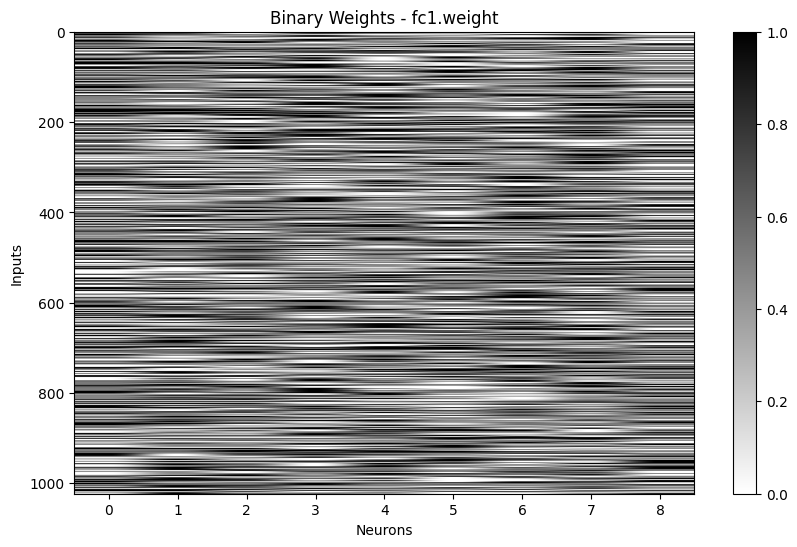

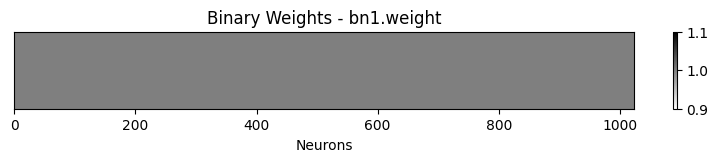

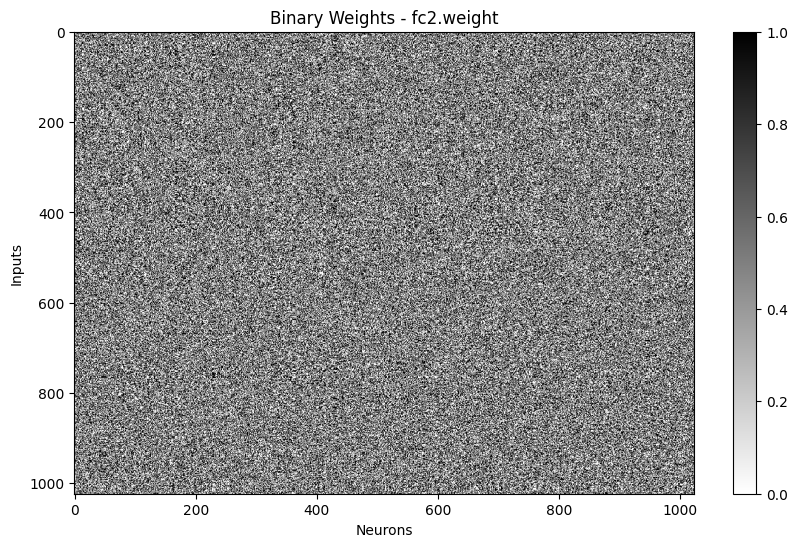

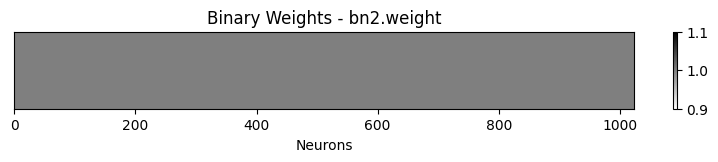

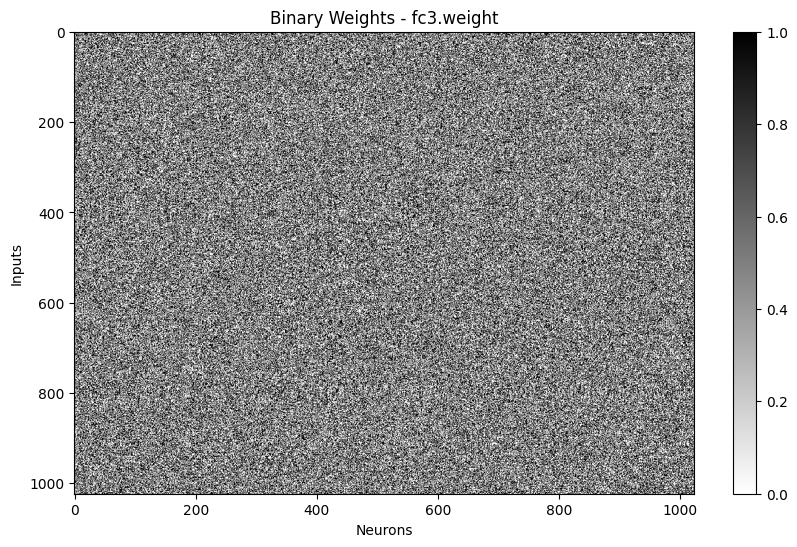

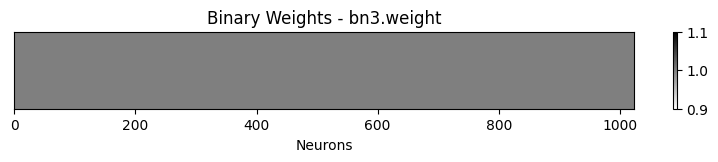

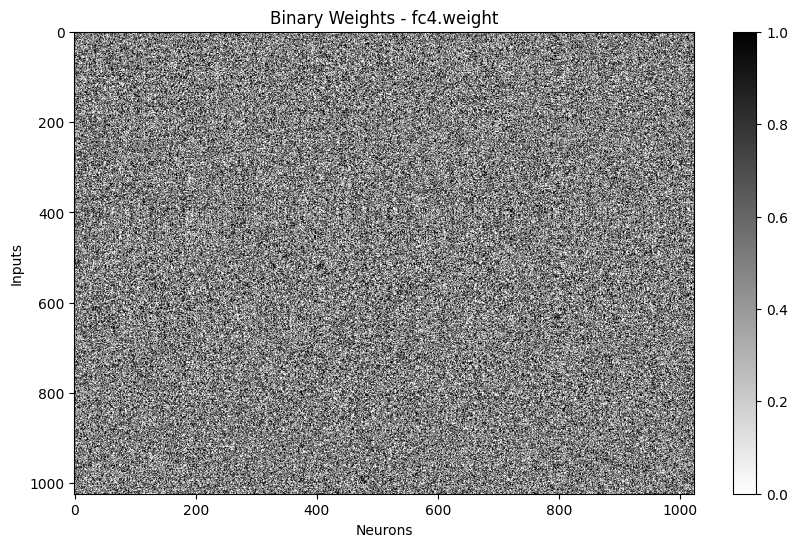

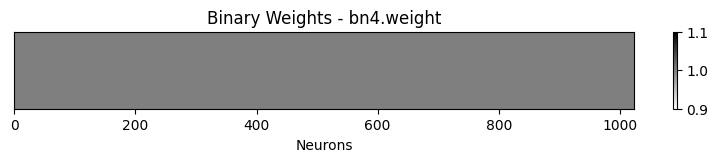

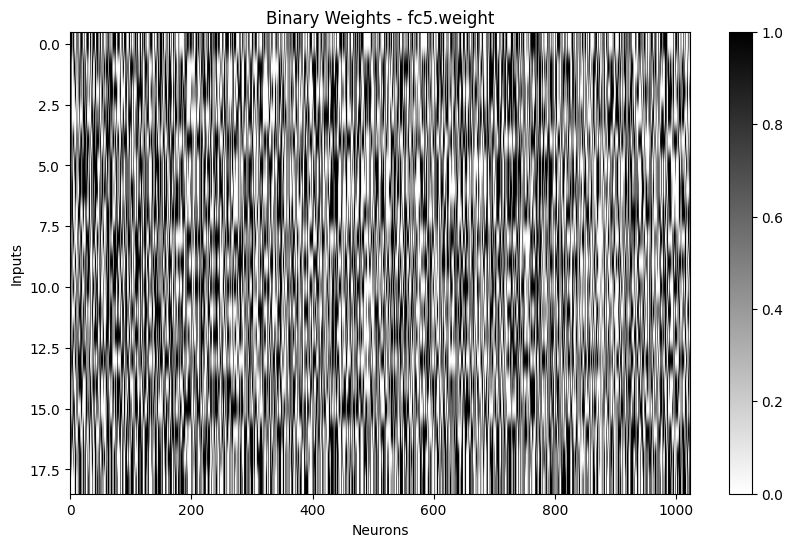

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define the Deep Binary Neural Network architecture
class DeepBinaryNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepBinaryNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()  # Binary activation function
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.dropout(self.act(self.bn1(self.fc1(x))))
        x = self.dropout(self.act(self.bn2(self.fc2(x))))
        x = self.dropout(self.act(self.bn3(self.fc3(x))))
        x = self.dropout(self.act(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x

# Load the best model weights
best_model_path = '/content/drive/MyDrive/cifar10/deep_binary_net_best.pth'
model = DeepBinaryNet(input_dim=3072, hidden_dim=1024, output_dim=10)  # CIFAR-10 input_dim
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Function to convert weights to binary
def binarize_weights(weights, threshold=0):
    return (weights >= threshold).float()

# Function to plot binary weights for fully connected layers
def plot_binary_weights_2d(weights, layer_name):
    plt.figure(figsize=(10, 6))
    plt.imshow(weights, cmap='binary', aspect='auto')
    plt.colorbar()
    plt.title(f'Binary Weights - {layer_name}')
    plt.xlabel('Neurons')
    plt.ylabel('Inputs')
    plt.show()

# Function to plot binary weights for batch normalization layers
def plot_binary_weights_1d(weights, layer_name):
    plt.figure(figsize=(10, 1))
    plt.imshow(weights.reshape(1, -1), cmap='binary', aspect='auto')
    plt.colorbar()
    plt.title(f'Binary Weights - {layer_name}')
    plt.xlabel('Neurons')
    plt.yticks([])
    plt.show()

# Extract and plot the binary weights from each layer
for name, param in model.named_parameters():
    if 'weight' in name:
        binary_weights = binarize_weights(param.data)
        if len(binary_weights.shape) == 2:  # For fully connected layers
            plot_binary_weights_2d(binary_weights.cpu().numpy(), name)
        elif len(binary_weights.shape) == 1:  # For batch normalization layers
            plot_binary_weights_1d(binary_weights.cpu().numpy(), name)


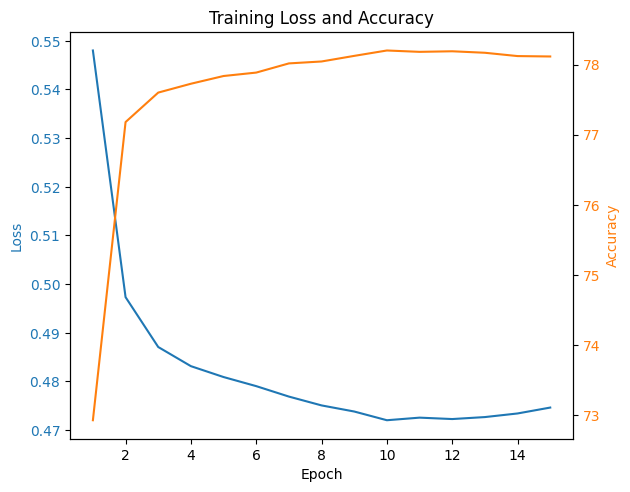

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_losses and train_accuracies are already defined
epochs = range(1, len(train_losses) + 1)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, train_losses, label='Train Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(epochs, train_accuracies, label='Train Accuracy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to make sure the right y-label is not slightly clipped
plt.title('Training Loss and Accuracy')
plt.show()


Confusion Matrix:
 [[1512    0    0   17  145    0    0  332  942 1552]
 [ 159    0    0    8   68    0    0  102  408  755]
 [ 177    0    0    3   60    0    0  209  203  807]
 [ 398    0    0   24  109    0    0  147 1038 1284]
 [ 171    0    0   17   46    0    0  105  397  764]
 [ 186    0    0   17   71    0    0   85  491  650]
 [ 162    0    0    2   61    0    0  199  232  844]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


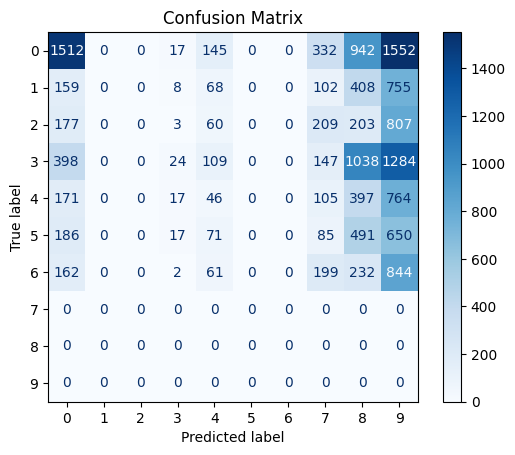

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Paths to the feature and label files
test_features_path = '/content/drive/MyDrive/cifar10/testing_features.npy'
test_labels_path = '/content/drive/MyDrive/cifar10/testing_labels.npy'
model_path = '/content/drive/MyDrive/cifar10/deep_binary_net_best.pth'

# Load the test data
X_test = np.load(test_features_path)
Y_test = np.load(test_labels_path)

# Ensure labels are binary
mlb = MultiLabelBinarizer()
Y_test = mlb.fit_transform(Y_test)

# Define the model architecture
class DeepBinaryNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepBinaryNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()  # Binary activation function
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.dropout(self.act(self.bn1(self.fc1(x))))
        x = self.dropout(self.act(self.bn2(self.fc2(x))))
        x = self.dropout(self.act(self.bn3(self.fc3(x))))
        x = self.dropout(self.act(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x

# Initialize the model
input_dim = X_test.shape[1]
hidden_dim = 1024  # Should match the hidden_dim used during training
output_dim = Y_test.shape[1]  # Number of classes (10 for CIFAR-10)
model = DeepBinaryNet(input_dim, hidden_dim, output_dim)

# Load the trained model weights
model.load_state_dict(torch.load(model_path))

# Convert test data to torch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

# Create test data loader
batch_size = 64
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluate the model
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Compute confusion matrix
cm = confusion_matrix(all_labels.argmax(axis=1), all_predictions.argmax(axis=1))
print("Confusion Matrix:\n", cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

# Define the Deep Binary Neural Network architecture (as provided in the original code)
class DeepBinaryNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepBinaryNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()  # Binary activation function
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.dropout(self.act(self.bn1(self.fc1(x))))
        x = self.dropout(self.act(self.bn2(self.fc2(x))))
        x = self.dropout(self.act(self.bn3(self.fc3(x))))
        x = self.dropout(self.act(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x

# Load the training features and labels
training_features_path = '/content/drive/MyDrive/cifar10/training_features.npy'
training_labels_path = '/content/drive/MyDrive/cifar10/training_features.npy'

X_train = np.load(training_features_path)
Y_train = np.load(training_labels_path, allow_pickle=True)

# Ensure labels are binary (if not already encoded)
mlb = MultiLabelBinarizer()
Y_train = mlb.fit_transform(Y_train)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)

# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 1024  # Hidden layer size
output_dim = Y_train.shape[1]  # Number of classes

# Initialize and load the model
model = DeepBinaryNet(input_dim, hidden_dim, output_dim)
best_model_path = '/content/drive/MyDrive/cifar10/deep_binary_net_best.pth'
model.load_state_dict(torch.load(best_model_path))

# Ensure the model is in evaluation mode
model.eval()

# Perform predictions on the training set
with torch.no_grad():
    outputs = model(X_train)
    predicted = (torch.sigmoid(outputs) >= 0.5).float().cpu().numpy()

# Flatten the arrays for confusion matrix calculation
Y_train_flat = Y_train.cpu().numpy().flatten()
predicted_flat = predicted.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(Y_train_flat, predicted_flat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
